In [1]:
import pandas as pd
import numpy as np

#data_temp = pd.read_csv('customized_daily_temp_data.csv')
#data_rain_fall = pd.read_csv('customized_daily_rainfall_data.csv')

#data_temp.head()

In [2]:
#data_rain_fall.head()

In [3]:
#data = pd.merge(data_temp, data_rain_fall, on=['Station', 'Year','Month','Day'])
#data.head(10)

In [4]:
# data = data.drop(['StationIndex_x', 'StationIndex_y'], axis = 1)
# data.head(10)

In [5]:
data = pd.read_csv('data_dailyall_rain_humd_temp_wind.csv')
data.head()

Year  Station  Month  Day  Rainfall  AvgHumidity  AvgTemp  AvgWindSpeed  \
0  1970  Barisal      1    1         0           78     16.2           1.0   
1  1970  Barisal      1    2         0           78     16.3           1.5   
2  1970  Barisal      1    3         0           81     16.4           0.5   
3  1970  Barisal      1    4         0           79     16.9           1.1   
4  1970  Barisal      1    5         0           80     17.2           0.8   

   StationIndex  
0             2  
1             2  
2             2  
3             2  
4             2

In [6]:
data.describe()

Year          Month            Day       Rainfall  \
count  519405.000000  519405.000000  519405.000000  519405.000000   
mean     1994.478305       6.499731      16.000000       6.519265   
std        13.161691       3.451805       8.944281      19.144884   
min      1970.000000       1.000000       1.000000       0.000000   
25%      1984.000000       4.000000       8.000000       0.000000   
50%      1995.000000       6.000000      16.000000       0.000000   
75%      2006.000000      10.000000      24.000000       3.000000   
max      2016.000000      12.000000      31.000000     590.000000   

         AvgHumidity        AvgTemp   AvgWindSpeed   StationIndex  
count  519405.000000  519405.000000  519405.000000  519405.000000  
mean       76.842258      24.630104       2.195391      17.037899  
std        17.494886       6.291361       2.410863       9.385964  
min         0.000000       0.000000       0.000000       1.000000  
25%        74.000000      22.000000       0.600000       9.000000  
50%        80.000000      26.700000       1.500000      17.000000  
75%        86.000000      28.600000       3.000000      25.000000  
max       100.000000      37.800000      68.000000      33.000000

In [7]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
data = data.drop(['AvgWindSpeed'], axis = 1)
data.Rainfall.unique()

array([  0,  21,   3,   4,   1,  11,   8,   2,  22,  44,  83,  10,  16,
       158,   5,  18,  12,  17,  40,  24,   9,   6,  65,  34,  41,  43,
         7,  15,  36,  61,  29,  13,  14,  23,  55,  20, 143, 213, 116,
        64,  80,  82,  39,  53,  66,  27,  72,  45,  28,  26,  31, 141,
       128,  57,  58,  76,  54,  52,  25,  38,  81,  89, 208,  79,  91,
        75,  32,  37, 106,  19, 133, 122,  33,  71, 100,  67,  35,  50,
        30,  86, 149, 196, 239,  51,  47,  42,  85,  96,  88,  59, 110,
        94,  60,  99,  56, 119,  68,  46, 217,  48, 211, 101, 123,  97,
        69, 197,  77, 113, 114,  84, 152,  49, 169,  63,  73, 120, 139,
        92,  62, 103, 115, 102, 218, 118,  95, 105, 112,  74, 121, 127,
        93, 135, 178, 142,  70, 228, 140,  78, 210, 170, 274, 155, 215,
        90, 220, 174, 107, 124, 320, 564, 144, 137, 131, 165, 109, 154,
       111, 151, 204, 160, 126, 251, 249, 138, 148,  98, 508, 381, 125,
       136, 104, 205, 199, 171, 292, 231, 108, 224, 193, 117, 18

In [8]:
data.Station.unique()

array(['Barisal', 'Bhola', 'Bogra', 'Chandpur', 'Chittagong', 'Comilla',
       'CoxsBazar', 'Dhaka', 'Dinajpur', 'Faridpur', 'Hatiya', 'Ishurdi',
       'Jessore', 'Khulna', 'M.court', 'Mymensingh', 'Rangamati',
       'Rangpur', 'Sandwip', 'Satkhira', 'Srimangal', 'Sylhet',
       'Rajshahi', 'Patuakhali', 'Feni', 'Khepupara', 'Madaripur',
       'Sitakunda', 'Teknaf', 'Kutubdia', 'Tangail', 'Mongla',
       'Ambagan_ctg'], dtype=object)

In [9]:
data.Station.value_counts()

CoxsBazar      17484
Barisal        17484
Satkhira       17484
Ishurdi        17484
Faridpur       17484
Rangamati      17484
Mymensingh     17484
Bogra          17174
Srimangal      17143
Rangpur        17112
Khulna         17112
Bhola          17112
Rajshahi       17112
Dhaka          17112
Comilla        17112
Sylhet         17112
M.court        16740
Sandwip        16740
Jessore        16368
Chandpur       15996
Feni           15996
Khepupara      15996
Chittagong     15624
Patuakhali     15624
Hatiya         15252
Sitakunda      14880
Madaripur      14880
Teknaf         14880
Dinajpur       14508
Kutubdia       11904
Tangail        11160
Mongla          9672
Ambagan_ctg     6696
Name: Station, dtype: int64

In [10]:
stations_name = data['Station'].unique()
data.Station.nunique()

33

In [11]:
data.groupby('Station', as_index=False)['Rainfall'].mean()

Station   Rainfall
0   Ambagan_ctg   7.941159
1       Barisal   5.618623
2         Bhola   6.180575
3         Bogra   4.623734
4      Chandpur   5.479995
5    Chittagong   7.760369
6       Comilla   5.430400
7     CoxsBazar   9.586937
8         Dhaka   5.490942
9      Dinajpur   5.136890
10     Faridpur   4.910547
11         Feni   7.783008
12       Hatiya   8.469250
13      Ishurdi   4.128232
14      Jessore   4.443426
15    Khepupara   7.321018
16       Khulna   4.746786
17     Kutubdia   8.464550
18      M.court   8.138053
19    Madaripur   5.255444
20       Mongla   5.172146
21   Mymensingh   5.657172
22   Patuakhali   6.802355
23     Rajshahi   3.930224
24    Rangamati   6.716884
25      Rangpur   5.850806
26      Sandwip   9.714038
27     Satkhira   4.450927
28    Sitakunda   8.339987
29    Srimangal   6.066733
30       Sylhet  10.945886
31      Tangail   4.791129
32       Teknaf  11.043414

In [12]:
import matplotlib.pyplot as plt

Station
Teknaf     11.043414
Sylhet     10.945886
Sandwip     9.714038
Name: Rainfall, dtype: float64
Station
Jessore     4.443426
Ishurdi     4.128232
Rajshahi    3.930224
Name: Rainfall, dtype: float64


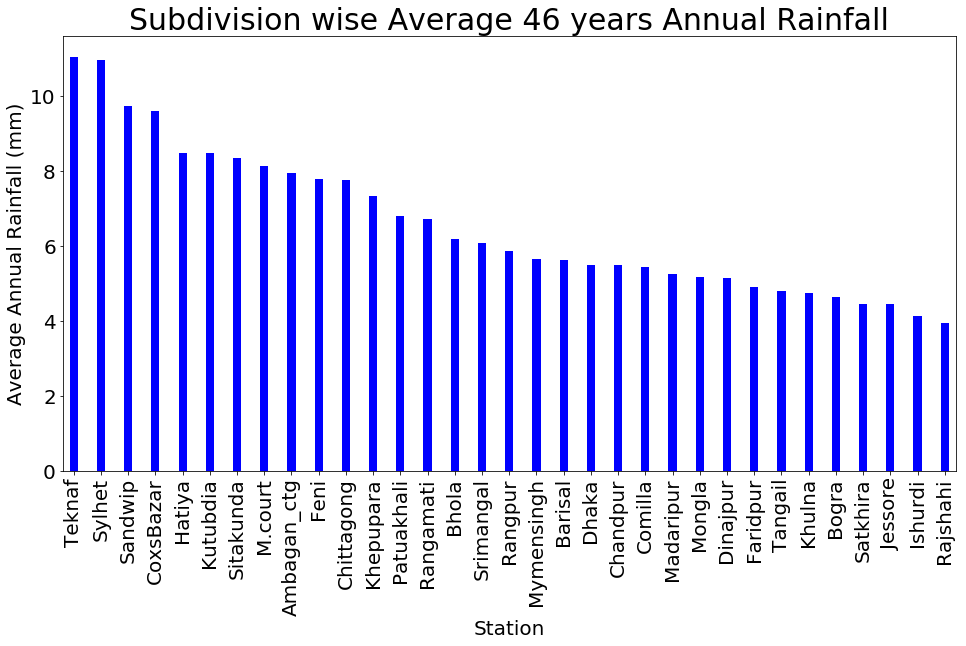

In [13]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

data.groupby('Station').mean().sort_values(by='Rainfall', ascending=False)['Rainfall'].plot('bar', color='b',width=0.3,title='Subdivision wise Average 46 years Annual Rainfall', fontsize=20)

plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

print(data.groupby('Station').mean().sort_values(by='Rainfall', ascending=False)['Rainfall'][[0,1,2]])

print(data.groupby('Station').mean().sort_values(by='Rainfall', ascending=False)['Rainfall'][[30,31,32]])

Max: 94110 ocurred in [2015]
Max: 32020 ocurred in [1972]
Mean: 72045.51063829787


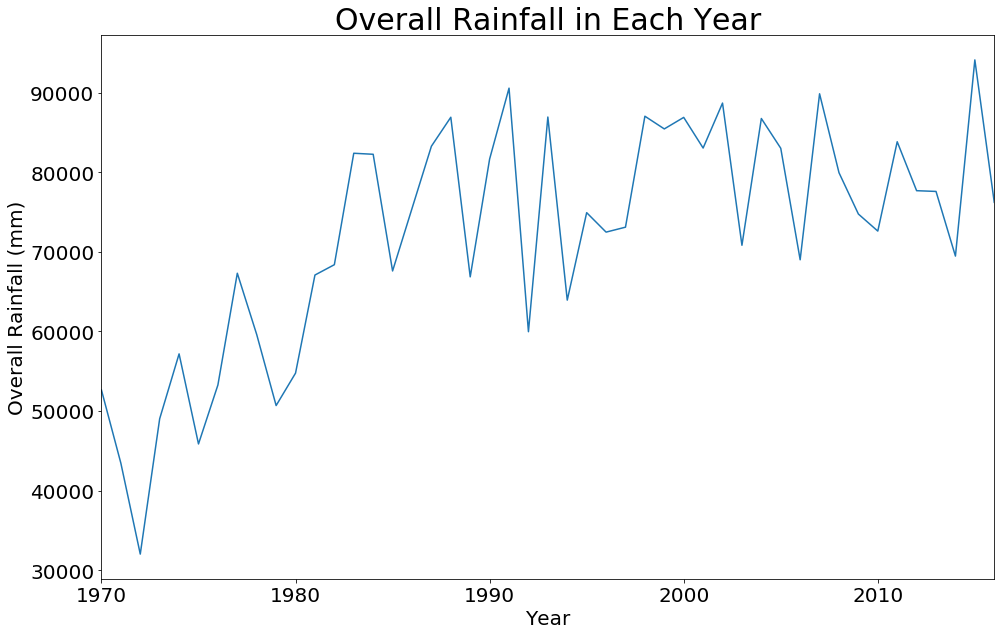

In [14]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = data.groupby('Year').sum()['Rainfall']
dfg.plot('line', title='Overall Rainfall in Each Year', fontsize=20)

plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))


In [15]:
# months = data.columns[2:14]
# fig = plt.figure(figsize=(18,10))
# ax = fig.add_subplot(111)
# xlbls = data['Station'].unique()
# xlbls.sort()
# dfg = data.groupby('Station').mean()[months]


# dfg.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
# plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
# plt.xticks(  rotation = 90)
# plt.ylabel('Rainfall (mm)')
# plt.legend(loc='upper right', fontsize = 'xx-large')
# ax.title.set_fontsize(30)
# ax.xaxis.label.set_fontsize(20)
# ax.yaxis.label.set_fontsize(20)


# dfg = dfg.mean(axis=0)
# print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
# print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
# print('Mean: ' + str(dfg.mean()))


In [16]:
# station = {'Dhaka':1, 'Tangail':2, 'Mymensingh':3, 'Faridpur':4, 'Madaripur':5,
#        'Srimangal':6, 'Sylhet':7, 'Bogra':8, 'Dinajpur':9, 'Ishurdi':10, 'Rajshahi':11,
#        'Rangpur':12, 'sydpur':13, 'chuadanga':14, 'Jessore':15, 'Khulna':16, 'Mongla':17,
#        'Satkhira':18, 'Barisal':19, 'Bhola':20, 'Khepupara':21, 'Patuakhali':22,
#        'Chandpur':23, 'Ambagan_ctg':24, 'Chittagong':25, 'Comilla':26, 'CoxsBazar':27,
#        'Feni':28, 'Hatiya':29, 'Kutubdia':30, 'M.court':31, 'Rangamati':32, 'Sandwip':33,
#        'Sitakunda':34, 'Teknaf':35}

# data.Station = [station[item] for item in data.Station]
# data.head(7)

In [17]:
label = []
for item in data.Rainfall:
    if item >= 1:
        label.append(1)
    else:
        label.append(0)
data['class'] = label
data.head()

Year  Station  Month  Day  Rainfall  AvgHumidity  AvgTemp  StationIndex  \
0  1970  Barisal      1    1         0           78     16.2             2   
1  1970  Barisal      1    2         0           78     16.3             2   
2  1970  Barisal      1    3         0           81     16.4             2   
3  1970  Barisal      1    4         0           79     16.9             2   
4  1970  Barisal      1    5         0           80     17.2             2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

In [18]:
# label = []
# output_layer = 100
# min_val = data['Rainfall'].min()
# max_val = data['Rainfall'].max()
# blocksize = (max_val-min_val)/output_layer
# print(min_val, max_val, blocksize)

# for i, item in enumerate(data['Rainfall']):
#     label.append(item/blocksize)
# data['label'] =label

In [19]:
 
data.to_csv (r'clean_rainfall_dataframe.csv', index = False, header=True)
data.head()

Year  Station  Month  Day  Rainfall  AvgHumidity  AvgTemp  StationIndex  \
0  1970  Barisal      1    1         0           78     16.2             2   
1  1970  Barisal      1    2         0           78     16.3             2   
2  1970  Barisal      1    3         0           81     16.4             2   
3  1970  Barisal      1    4         0           79     16.9             2   
4  1970  Barisal      1    5         0           80     17.2             2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

In [20]:
data_f = data.drop(['Station'], axis = 1)
#data_f = data_f.drop(data_f.index[0])

# from sklearn import preprocessing
# # create the Labelencoder object
# le = preprocessing.LabelEncoder()

#data_f = le.fit_transform(data_f)

X = data_f.drop(['class','Rainfall'], axis=1)
y = data_f['class']

X.head()

Year  Month  Day  AvgHumidity  AvgTemp  StationIndex
0  1970      1    1           78     16.2             2
1  1970      1    2           78     16.3             2
2  1970      1    3           81     16.4             2
3  1970      1    4           79     16.9             2
4  1970      1    5           80     17.2             2

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


## Classifiers

In [111]:
#print(type(X_train['Year']))
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(X_test)
#print(y_pred)

In [112]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.720501597977179


In [113]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(random_state=0)

pred = svc_model.fit(X_train, y_train).predict(X_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",metrics.accuracy_score(y_test, pred, normalize = True))

LinearSVC accuracy :  0.5545622569341941


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [114]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(X_train, y_train)
# predict the response
pred = neigh.predict(X_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",metrics.accuracy_score(y_test, pred))

KNeighbors accuracy score :  0.8048735095172697


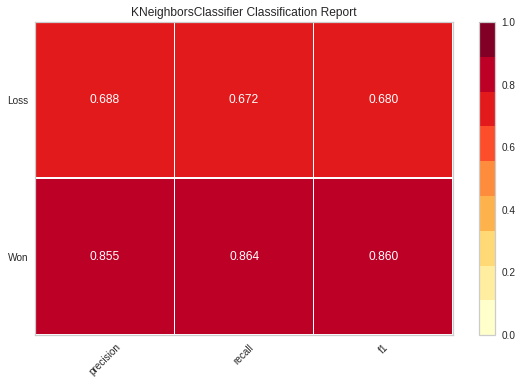

In [115]:
#!pip install yellowbrick
#!pip install scikit-learn==0.20.0

from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

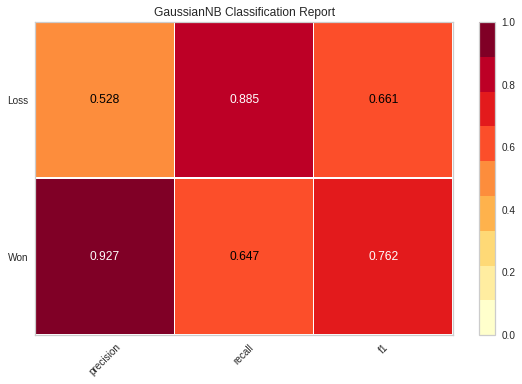

In [116]:
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


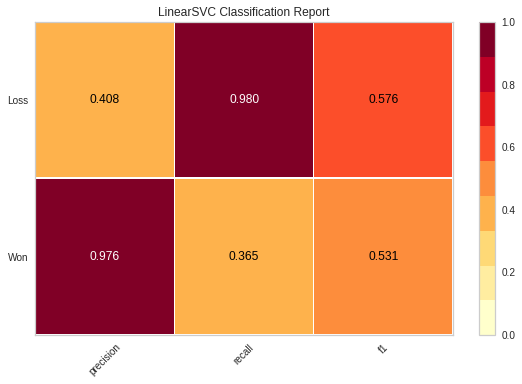

In [117]:
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

## Regression

In [118]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[94790 12968]
 [18674 29390]]


In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86    107758
           1       0.69      0.61      0.65     48064

   micro avg       0.80      0.80      0.80    155822
   macro avg       0.76      0.75      0.75    155822
weighted avg       0.79      0.80      0.79    155822



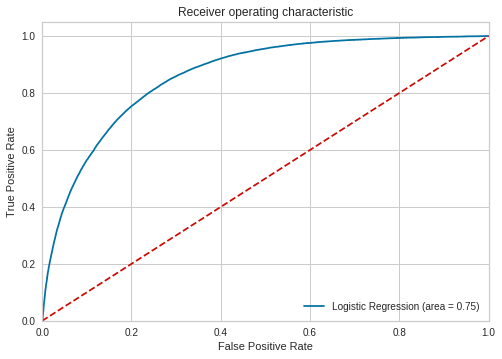

In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [124]:
y_pred = linreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.13


In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(X_train[:10000], y_train[:10000])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [23]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test[:10000])# Calculate the absolute errors
errors = abs(predictions - y_test[:10000])# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.24 degrees.


In [24]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test[:10000])# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


In [26]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rf.estimators_[5]# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rf.estimators_[5]# Export the image to a dot file

#feature_list = X_train.feature_list

export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train[:10000].columns, rounded = True, precision = 1)# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file
graph.write_png('tree1.png')

In [31]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')

In [25]:
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in rf.estimators_[5]:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=X_train[:10000].columns,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1

TypeError: 'DecisionTreeRegressor' object is not iterable

## boost

In [23]:
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    model = XGBClassifier(random_state=1,learning_rate=learning_rate)
    model.fit(X_train, y_train)
    # make predictions for test data
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))
    
    

Learning rate:  0.05
Accuracy score (training): 0.836
Accuracy score (validation): 0.836
Learning rate:  0.075
Accuracy score (training): 0.838
Accuracy score (validation): 0.838
Learning rate:  0.1
Accuracy score (training): 0.840
Accuracy score (validation): 0.839
Learning rate:  0.25
Accuracy score (training): 0.845
Accuracy score (validation): 0.842
Learning rate:  0.5
Accuracy score (training): 0.852
Accuracy score (validation): 0.845
Learning rate:  0.75
Accuracy score (training): 0.855
Accuracy score (validation): 0.843
Learning rate:  1
Accuracy score (training): 0.856
Accuracy score (validation): 0.841


In [24]:
model = XGBClassifier(random_state=1,learning_rate=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 84.10%


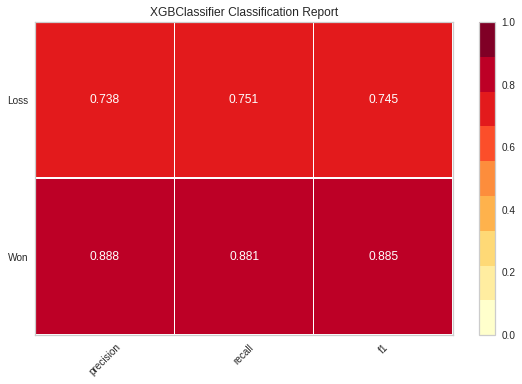

In [25]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(model, classes=['Won','Loss'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[94939 12807]
 [11970 36106]]


In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:

    abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=learning_rate)
    
    model = abc.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))




Learning rate:  0.05
Accuracy score (training): 0.807
Accuracy score (validation): 0.807
Learning rate:  0.075
Accuracy score (training): 0.810
Accuracy score (validation): 0.810
Learning rate:  0.1
Accuracy score (training): 0.813
Accuracy score (validation): 0.814
Learning rate:  0.25
Accuracy score (training): 0.818
Accuracy score (validation): 0.819
Learning rate:  0.5
Accuracy score (training): 0.819
Accuracy score (validation): 0.819
Learning rate:  0.75
Accuracy score (training): 0.822
Accuracy score (validation): 0.822
Learning rate:  1
Accuracy score (training): 0.826
Accuracy score (validation): 0.827


In [30]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
    
model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)* 100.0)

Accuracy: 82.65585090680392


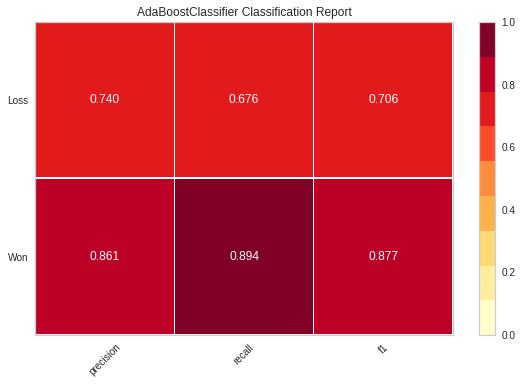

In [31]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(model, classes=['Won','Loss'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.798
Accuracy score (validation): 0.797
Learning rate:  0.075
Accuracy score (training): 0.806
Accuracy score (validation): 0.806
Learning rate:  0.1
Accuracy score (training): 0.807
Accuracy score (validation): 0.807
Learning rate:  0.25
Accuracy score (training): 0.818
Accuracy score (validation): 0.819
Learning rate:  0.5
Accuracy score (training): 0.820
Accuracy score (validation): 0.821
Learning rate:  0.75
Accuracy score (training): 0.823
Accuracy score (validation): 0.824
Learning rate:  1
Accuracy score (training): 0.828
Accuracy score (validation): 0.828


In [34]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
y_pred = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)* 100.0)

Confusion Matrix:
[[95909 11837]
 [14931 33145]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88    107746
           1       0.74      0.69      0.71     48076

   micro avg       0.83      0.83      0.83    155822
   macro avg       0.80      0.79      0.79    155822
weighted avg       0.83      0.83      0.83    155822

Accuracy: 82.82142444584206


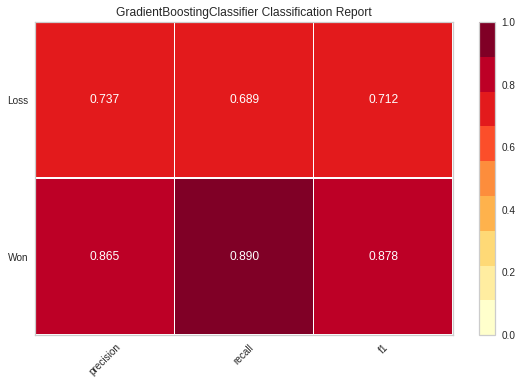

In [35]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gb_clf2, classes=['Won','Loss'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [ ]:


from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')


abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)


model = abc.fit(X_train, y_train)


y_pred = model.predict(X_test)